# Apparent reporting delay (Meldeverzug) in data sources for Germany (JHU and RKI)

See [this earlier post](compare-rki-and-jhu-data.html) for an introduction. Here we continue the comparison of RKI and JHU with some additional plots. 

In particular, we note an apparent delay in the provision of numbers of deaths in the RKI data ("Meldeverzug"). It is known that it takes some time for infectionts and deaths to be reported to the Robert Koch Institute (RKI). Here we investigate how long by taking one snapshot of data for cases and infections (on 14 Nov 2020) and comparing this with the same data downloaded more recently (04 Jan 2021). 

One of the main conclusions is that that the deaths from RKI are reported not on the day that people died but for the day on which their infection was reported, or the illness started. This is important for the interpretation of deaths reported by RKI, and shown for [Landkreise on OSCOVIDA](https://oscovida.github.io/germany.html).



In [1]:
%config InlineBackend.figure_formats = ['svg']
import datetime
import numpy as np
import pandas as pd
import oscovida as ov
import matplotlib.pyplot as plt

ov.display_binder_link("2020-germany-reporting-delay-meldeverzug.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/2020-germany-reporting-delay-meldeverzug.ipynb)

In [24]:
# clear the local cache, i.e. force re-download of data sets
# ov.clear_cache()

## Get data from Johns Hopkins University (JHU)

In [3]:
cases_jhu, deaths_jhu = ov.get_country_data("Germany")

Downloaded data: last data point 1/3/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Downloaded data: last data point 1/3/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


## Get data from Robert-Koch Institute (RKI)


In [4]:
germany = ov.fetch_data_germany()

Please be patient - downloading data from https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data ...
Completed downloading 894786 rows in 107.8 seconds.


As we want the total numbers for Germany, wwe need to accumulate over all districts (Landkreise) and various rows for each date:

In [5]:
# We use 'Meldedatum' as this is expected to be closest to the JHU data
g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
# an interesting alternative to explore is 'Refdatum':
# g2 = germany.set_index(pd.to_datetime(germany['Refdatum']))

g2.index.name = 'date'
g3 = g2.groupby('date').agg('sum')
cases_rki = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
deaths_rki = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()


## Comparison of cases between from JHU and RKI: pretty similar

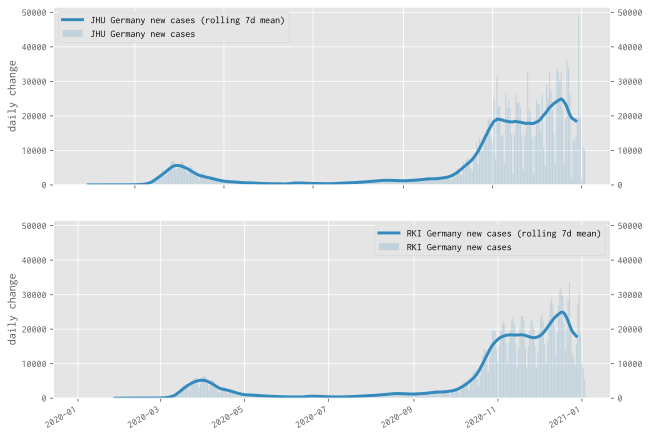

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, cases_jhu, color="C1", labels=["JHU Germany", "cases"])
ax = axes[1]
ov.plot_daily_change(ax, cases_rki, color="C1", labels=["RKI Germany", "cases"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

While there are differences in the data sets (the bars), the overall trend (line) appears similar. 

## Comparison of reported deaths between from JHU and RKI: quite different

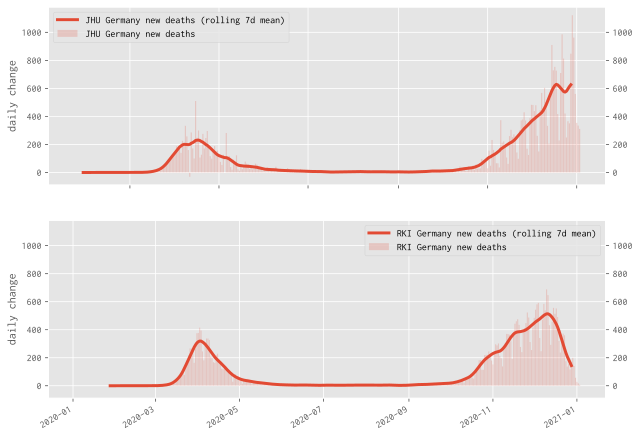

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, deaths_jhu, color="C0", labels=["JHU Germany", "deaths"])
ax = axes[1]
ov.plot_daily_change(ax, deaths_rki, color="C0", labels=["RKI Germany", "deaths"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

The deaths from JHU and RKI differ significantly (see in particular the most recent data points, i.e. to the right in the two plots).

## Discussion

The JHU and RKI data provided for Germany show some differences, including:

- the JHU data is noisier in comparison to the smoother RKI data
- the amount of deaths in the last weeks appears overestimated in the JHU data or underestimated in the RKI

Both phenomena can be explained with the hypothesis that the RKI data is updated retrospectively to introduce corrections: if a death that has been occured 3 days ago is registered with the RKI, it will update the data set and add that death to the date 3 days ago. In contrast, we hypothesize that the JHU data appears to try to be as accurate as possible, but not retrospectively change dates in the past but rather add corrective numbers to the last data point (sometimes even negative deaths if required to compensate for inaccurate data). 

The more regular data from the RKI is thus explainable by the retrospective improvement of the data: as more and more numbers appear at the RKI (even from weeks in the past), the data set becomes increasingly more accurate. 

Some underestimation of deaths and cases from RKI could also be explained: as reported cases and deaths may only arrive at the RKI days after their occurance, the numbers that are reported today for yesterday are likely to be too small. There is a danger that this is misleading. We investigate this aspect further now.

We also note (see discussion below) that for numbers of deaths the RKI reports the date of *reporting the case, not the day on which the person has died*. 




# Example  study: deaths up to 13 November 2020

To emphasive the delay in the numbers being reported, we look at a particular data set up to 13 November 2020 as an example:

On 14 November, we saved the dataset *as it was available then* from the RKI and the JHU university to local files. We now load the data as it was downloded on 14 November 2020, i.e. with the last data point from 13 Nov:


In [8]:
# The code used to create the RKI data set is 
# # We use 'Meldedatum' as this is expected to be closest to the JHU data
# germany = ov.fetch_data_germany()
# g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
# g2.index.name = 'date'
# g3 = g2.groupby('date').agg('sum')
# cases_rki = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
# deaths_rki = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()
# (then save to csv file)

In [9]:
cases_rki_old = pd.read_csv("cases-rki-germany-meldedatum-2020-11-13.csv", parse_dates=['date'], 
                            index_col=0, squeeze=True)
deaths_rki_old = pd.read_csv("deaths-rki-germany-meldedatum-2020-11-13.csv", parse_dates=['date'], 
                             index_col=0, squeeze=True)
cases_jhu_old = pd.read_csv("cases-jhu-germany-2020-11-13.csv", parse_dates=[0], 
                            index_col=0, squeeze=True)
deaths_jhu_old = pd.read_csv("deaths-jhu-germany-2020-11-13.csv", parse_dates=[0], 
                             index_col=0, squeeze=True)

We will see below that the JHU data for that period as downloaded on 14 November has not changed between then and the data downloaded today. We check this by substracting the values for each day between 1 September and 13 November 2020, and looking at the maximum:

In [10]:
startdate = "2020-09-01"
enddate = "2020-11-13"

In [11]:
max(abs(deaths_jhu_old[startdate:enddate] - deaths_jhu[startdate:enddate]))

0

In [12]:
max(abs(cases_jhu_old[startdate:enddate] - cases_jhu[startdate:enddate]))

0

The RKI data, on the other hand, has changed. For example:

In [13]:
max(abs(cases_rki_old[startdate:enddate] - cases_rki[startdate:enddate]))

13168

We investigate this more systematically:

## Comparison between RKI deaths for Sept/Oct/Nov from 13 Nov 2020 and later

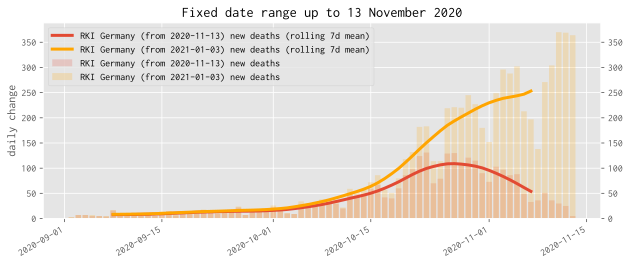

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))
startdate = "2020-09-01"
enddate = "2020-11-13"
todaystring = deaths_jhu.index[-1].strftime("%Y-%m-%d")  # something like 202?-??-?? 

ov.plot_daily_change(ax, deaths_rki_old[startdate:enddate], color="C0", 
                     labels=["RKI Germany (from 2020-11-13)", "deaths"])
fig.autofmt_xdate()
ov.plot_daily_change(ax, deaths_rki[startdate:enddate], color='orange', 
                     labels=[f"RKI Germany (from {todaystring})", "deaths"])
ax.set_title("Fixed date range up to 13 November 2020");
ax.legend()


The plot above shows the daily new deaths as reported on 14 November from RKI in red (bars, and 7-day averaged data shown as line) and as reported today in orange (bars, and 7-day averaged data shown as line).

The deviation in the reported deaths in the last 2 weeks is quite significant! This is a big warning sign that when we consider deaths in the recent past through data reported from the RKI, we must take into account that in the last one or two weeks the reported numbers are likely to be incomplete and to grow over time.

We have quick look at infections, before studying the delay in reported deaths more systematically.

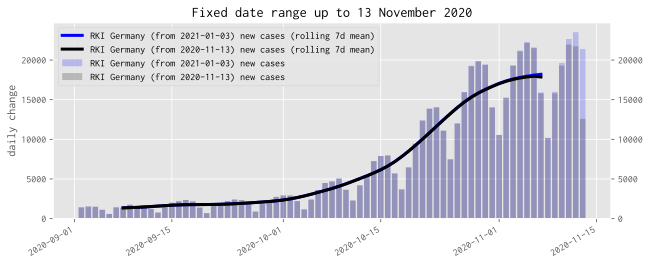

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
startdate = "2020-09-01"
enddate = "2020-11-13"

ov.plot_daily_change(ax, cases_rki[startdate:enddate], color="blue", 
                     labels=[f"RKI Germany (from {todaystring})", "cases"])
ov.plot_daily_change(ax, cases_rki_old[startdate:enddate], color="black", 
                     labels=["RKI Germany (from 2020-11-13)", "cases"])
fig.autofmt_xdate()

ax.set_title("Fixed date range up to 13 November 2020");


The deviation in the number of cases (blue as reported today, black as reported on 14 November 2020 - they appear darker when plotted on top of each other in the bars) is much smaller than for deaths: only for the last day is a significant deviation visible.

Let's look at just the differences in reported infections as function of how much time there was between the day in question and the day we have downloaded the numbers:

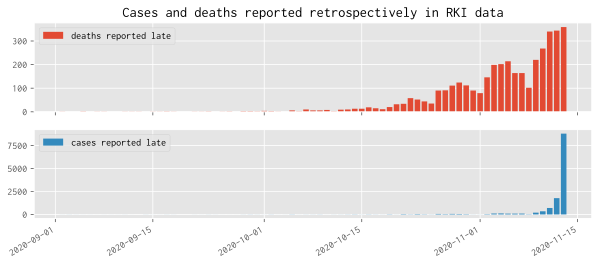

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(10, 4))
startdate = "2020-09-01"
enddate = "2020-11-13"
enddate = "2020-11-13"

diff_deaths_rki = deaths_rki[startdate:enddate].diff() - deaths_rki_old[startdate:enddate].diff()
diff_cases_rki = cases_rki[startdate:enddate].diff() - cases_rki_old[startdate:enddate].diff()

ax = axes[0]
ax.plot()
ax.bar(diff_deaths_rki.index, diff_deaths_rki.values, color="C0", label="deaths reported late")
ax.legend(loc='upper left')
ax = axes[1]
ax.bar(diff_cases_rki.index, diff_cases_rki.values, color="C1", label="cases reported late");
ax.legend(loc='upper left')


axes[0].set_title("Cases and deaths reported retrospectively in RKI data");
fig.autofmt_xdate();


For the numbers of deaths (upper plot in the figure above), we can see the difference in deaths between the report from 14 November and today. We can see that on 13 November, there was a deviation of about 300, which decreases when looking at earlier dates: two weeks before (1 November) the deviation is only about 100.

For the infections (lower plot), the deviation is only significicant for the last few days before 14 November.

To obtain some general guidance regarding the impact of this reporting delay, we work out the *fraction* of the total new deaths (and cases) that are reported with delay:

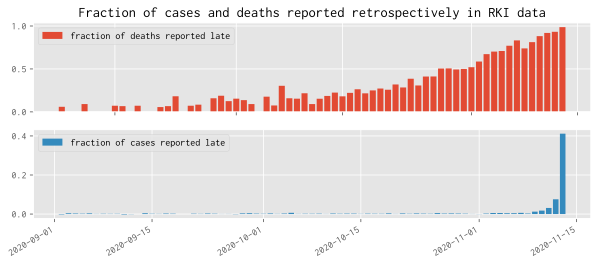

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(10, 4))
ax = axes[0]

# for late deaths: ignore data points where the total number of data points is smaller than n
# this avoids that one late report for a death (out of 4 in total) shows up as 25% error:
n = 10
tmp = deaths_rki.diff()
tmp[tmp < 10] = np.nan
diff_deaths_rel = diff_deaths_rki / tmp
# case numbers are so high that this is no problem
diff_cases_rel = diff_cases_rki / cases_rki.diff()

ax.bar(diff_deaths_rel.index, diff_deaths_rel.values, color="C0", label="fraction of deaths reported late")
ax.legend(loc='upper left')
ax = axes[1]
ax.bar(diff_cases_rel.index, diff_cases_rel.values, color="C1", label="fraction of cases reported late");
ax.legend(loc='upper left')

axes[0].set_title("Fraction of cases and deaths reported retrospectively in RKI data");
fig.autofmt_xdate()

# Conclusions

Summary of observations based on a snapshot of the data from N=13 November 2020. (In [an earlier post](compare-rki-and-jhu-data.html) we show that over longer time scales the RKI data as reported for infections is broadly in agreement with the JHU data.)


* Retrospective corrections of data
  - the JHU data published on day N+1 contains deaths and cases up to day N. The JHU data for day N (or days <N) is not modified after day N+1. 
  - the RKI data is modified retrospectively, taking into account the reports of infections and deaths that are accumulated from across all of Germany. 
  - We speculate that the RKI data is more accurate in the long term (i.e. if the date of interest is more than several weeks in the past), but the data for day N on day N+1 may not be so accurate.

* Delayed reporting
  We call a reported case or death occuring on day N "late" if the information is not available on day N+1.
  - The JHU data has per definition no late reports. 
  - The RKI data for infections has a small number of delayed reports. For our snapshot, 40% of the infections for day N were not reported on day N+1, and about 7.5% were missing for day N-1 (see blue data in plot "Fraction of cases and deaths reporterted retrospectively in RKI data"above, or list below). With one week delay (i.e. for N-7), only 0.5% of the cases were missing.
  - Reasons for the delay in the data becoming available at the RKI electronically are  known and have been described before (for example [this report in german](https://www.ndr.de/nachrichten/info/So-stark-wirkt-sich-der-Meldeverzug-auf-die-Corona-Daten-aus,coronadaten112.html) or [this one](https://www.br.de/nachrichten/wissen/haeufig-gestellte-fragen-zu-den-coronavirus-statistiken,Rvmnej4). They include delays in establishing the cause of deaths, and propagation of such information to the RKI.

* Numbers of deaths are not linked to date of death for data from RKI
  - The RKI data for deaths has a large number of delayed reports. For our snapshot over 98% of the deaths from day N where not reported on day N+1 (see red data in plot "Fraction of cases and deaths reporterted retrospectively in RKI data"above). With one week delay (i.e. for N-7), still about 80% of the cases were missing. With two weeks delay (i.e. N-14), about 50% of the cases were missing, and after 4 weeks about 25% were missing.
  - The explanation for this apparent delay is raised in the discussion on [this page, contribution from `strubbi77` on 25 May 2020](https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6): it is pointed out that the *date of death is not captured* but that instead the date at which the *infection started* for that person (`RefDatum`) or the date on which the infection was reported (`MeldeDatum`) is used. So we need to expect a significant delay for the deaths being reported: What is shown is not how many people died on the day, but how many people who were infected on the day died later.
   
    Consistent with that information is that the delay for reported deaths extends *over multiple weeks*. For the data for German districts on OSCOVIDA (i.e. plots available from https://oscovida.github.io/germany.html), this means that the numbers of reported deaths should only be taking as a reliable source of information after many weeks have passed: for the example looked at here, a quarter of the deaths were still missing from the statistics 4 weeks after the date. The interpretation probably is that for a quarter of the people who die from COVID, the time between infection and death is longer than 4 weeks.

* Caveat
   - For our snapshot, we have taken aggregated the RKI data on 14 November based on the `MeldeDatum`. The study should be repeated using the `RefDatum` as well. 



# Appendix

We provide a few additional time series and plots for the interested reader below.

In [18]:
# numerical values for fraction of cases reported late
diff_cases_rel[startdate:enddate][::-1][0:7]

date
2020-11-13    0.411624
2020-11-12    0.075510
2020-11-11    0.031159
2020-11-10    0.017560
2020-11-09    0.012252
2020-11-08    0.002649
2020-11-07    0.005972
Name: AnzahlFall, dtype: float64

In [19]:
# numerical values for fraction of deaths reported late
diff_deaths_rel[startdate:enddate][::-1][0:28]

date
2020-11-13    0.986264
2020-11-12    0.932249
2020-11-11    0.918919
2020-11-10    0.881579
2020-11-09    0.811808
2020-11-08    0.739130
2020-11-07    0.832487
2020-11-06    0.769953
2020-11-05    0.708609
2020-11-04    0.701389
2020-11-03    0.672297
2020-11-02    0.586345
2020-11-01    0.519737
2020-10-31    0.500000
2020-10-30    0.493392
2020-10-29    0.506122
2020-10-28    0.504545
2020-10-27    0.411765
2020-10-26    0.410959
2020-10-25    0.307018
2020-10-24    0.385965
2020-10-23    0.284153
2020-10-22    0.318681
2020-10-21    0.257576
2020-10-20    0.271186
2020-10-19    0.250000
2020-10-18    0.215686
2020-10-17    0.263158
Name: AnzahlTodesfall, dtype: float64

# Appendix 1: Comparison JHU / RKI for cases and deaths for the past few weeks

Text(0, 0.5, 'daily change (RKI) with\nsome reporting delay')

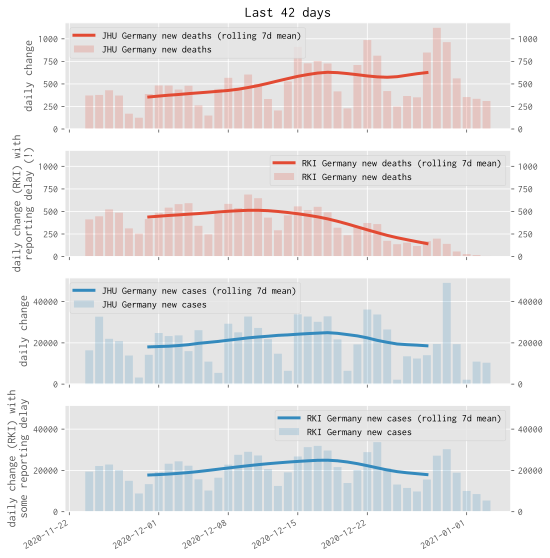

In [20]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))
ax = axes[0]
last_n_days = 42
ov.plot_daily_change(ax, deaths_jhu[-last_n_days:], color="C0", labels=["JHU Germany", "deaths"])
ax = axes[1]
ov.plot_daily_change(ax, deaths_rki[-last_n_days:], color="C0", labels=["RKI Germany", "deaths"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());
axes[0].set_title(f"Last {last_n_days} days");
axes[1].set_ylabel("daily change (RKI) with\nreporting delay (!)")

ax = axes[2]
ov.plot_daily_change(ax, cases_jhu[-last_n_days:], color="C1", labels=["JHU Germany", "cases"])
ax = axes[3]
ov.plot_daily_change(ax, cases_rki[-last_n_days:], color="C1", labels=["RKI Germany", "cases"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());
axes[3].set_ylim(axes[2].get_ylim());
axes[3].set_ylabel("daily change (RKI) with\nsome reporting delay")



# Appendix 2: Overview plot Germany with RKI data

The overview plot for Germany (http://oscovida.github.io/html/Germany.html) is based on JHU data (and for completeness attached below). Here we provide the same observables but based on the accumulated RKI data.

We expect the RKI data to severly underestimate the number of deaths in the most recent week(s) - see discussion above.

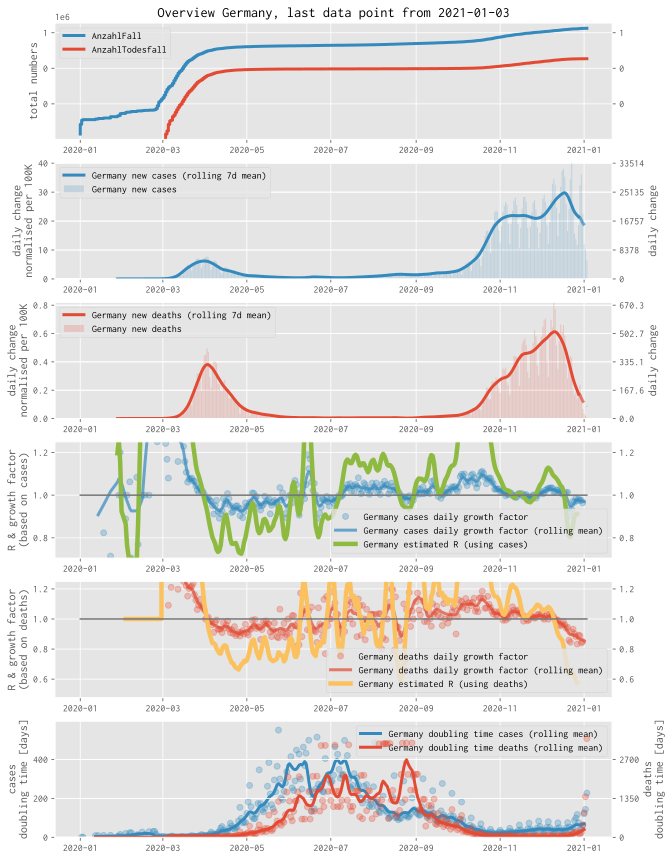

In [21]:
ov.overview(country="Germany", data=(cases_rki, deaths_rki));

## Appendix 2: Overview plot Germany with JHU data

This is the 'normal' plot that is shown on the OSCOVIDA pages, i.e. at http://oscovida.github.io/html/Germany.html :

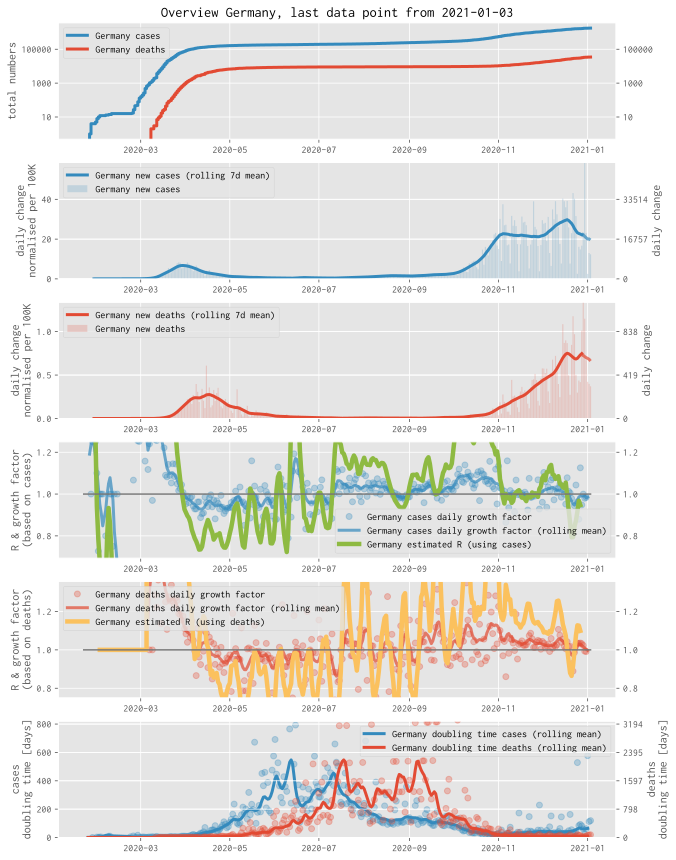

In [22]:
ov.overview(country="Germany");

In [23]:
ov.display_binder_link("2020-germany-reporting-delay-meldeverzug.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/2020-germany-reporting-delay-meldeverzug.ipynb)